# Pokemon Dataset Exploratory Data Analysis

The data comes from https://www.kaggle.com/datasets/abcsds/pokemon. This dataset features pokemon from the first 6 generations.
Below are the descriptions for each of the columns:

Below are the descriptions for each of the columns:

- **#**: ID for each pokemon
- **Name**: Name of each pokemon
- **Type 1**: Each pokemon has a type, this determines weakness/resistance to attacks
- **Type 2**: Some pokemon are dual type and have 2
- **Total**: sum of all stats that come after this, a general guide to how strong a pokemon is
- **HP**: hit points, or health, defines how much damage a pokemon can withstand before fainting
- **Attack**: the base modifier for normal attacks (eg. Scratch, Punch)
- **Defense**: the base damage resistance against normal attacks
- **SP Atk**: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- **SP Def**: the base damage resistance against special attacks
- **Speed**: determines which pokemon attacks first each round




In [1]:
pip install seaborn


You should consider upgrading via the '/home/kevinkurianai/.pyenv/versions/3.9.10/envs/venv/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

You should consider upgrading via the '/home/kevinkurianai/.pyenv/versions/3.9.10/envs/venv/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

You should consider upgrading via the '/home/kevinkurianai/.pyenv/versions/3.9.10/envs/venv/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

In [5]:
pokold = pd.read_csv("/mnt/c/Users/Georg/PokemonProject/Pokemon.csv")

# pokold = pd.read_csv("/mnt/c/Users/Kevin/PokemonProject/Pokemon.csv")

In [6]:
pok = pokold.rename(
    columns={
        "Sp. Def": "SpecialDefense",
        "Sp. Atk": "SpecialAttack",
        "Type 1": "Type1",
        "Type 2": "Type2",
    }
)
pok

,#,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAttack,SpecialDefense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [7]:
#Create normalzized columns for interpretability

pok.insert(7, "Attack1", value=0, allow_duplicates=True)
pok.insert(9, "Defense1", value=0, allow_duplicates=True)
pok.insert(11, "SpecialAttack1", value=0, allow_duplicates=True)
pok.insert(13, "SpecialDefense1", value=0, allow_duplicates=True)
pok.insert(15, "Speed1", value=0, allow_duplicates=True)
pok.insert(6, "HP1", value=0, allow_duplicates=True)


pok.HP1 = pok.HP / pok.Total
pok.Attack1 = pok.Attack / pok.Total
pok.Defense1 = pok.Defense / pok.Total
pok.SpecialAttack1 = pok.SpecialAttack / pok.Total
pok.SpecialDefense1 = pok.SpecialDefense / pok.Total
pok.Speed1 = pok.Speed / pok.Total

pok

,#,Name,Type1,Type2,Total,HP,HP1,Attack,Attack1,Defense,Defense1,SpecialAttack,SpecialAttack1,SpecialDefense,SpecialDefense1,Speed,Speed1,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,0.141509,49,0.154088,49,0.154088,65,0.204403,65,0.204403,45,0.141509,1,False
1,2,Ivysaur,Grass,Poison,405,60,0.148148,62,0.153086,63,0.155556,80,0.197531,80,0.197531,60,0.148148,1,False
2,3,Venusaur,Grass,Poison,525,80,0.152381,82,0.156190,83,0.158095,100,0.190476,100,0.190476,80,0.152381,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,0.128000,100,0.160000,123,0.196800,122,0.195200,120,0.192000,80,0.128000,1,False
4,4,Charmander,Fire,NaN,309,39,0.126214,52,0.168285,43,0.139159,60,0.194175,50,0.161812,65,0.210356,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,0.083333,100,0.166667,150,0.250000,100,0.166667,150,0.250000,50,0.083333,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,0.071429,160,0.228571,110,0.157143,160,0.228571,110,0.157143,110,0.157143,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,0.133333,110,0.183333,60,0.100000,150,0.250000,130,0.216667,70,0.116667,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,0.117647,160,0.235294,60,0.088235,170,0.250000,130,0.191176,80,0.117647,6,True


In [8]:
#Rounding normalized data to the 4th decimal place
pok = pok.round(
    {
        "HP1": 4,
        "Attack1": 4,
        "Defense1": 4,
        "SpecialAttack1": 4,
        "SpecialDefense1": 4,
        "Speed1": 4,
    }
)
pok

,#,Name,Type1,Type2,Total,HP,HP1,Attack,Attack1,Defense,Defense1,SpecialAttack,SpecialAttack1,SpecialDefense,SpecialDefense1,Speed,Speed1,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,0.1415,49,0.1541,49,0.1541,65,0.2044,65,0.2044,45,0.1415,1,False
1,2,Ivysaur,Grass,Poison,405,60,0.1481,62,0.1531,63,0.1556,80,0.1975,80,0.1975,60,0.1481,1,False
2,3,Venusaur,Grass,Poison,525,80,0.1524,82,0.1562,83,0.1581,100,0.1905,100,0.1905,80,0.1524,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,0.1280,100,0.1600,123,0.1968,122,0.1952,120,0.1920,80,0.1280,1,False
4,4,Charmander,Fire,NaN,309,39,0.1262,52,0.1683,43,0.1392,60,0.1942,50,0.1618,65,0.2104,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,0.0833,100,0.1667,150,0.2500,100,0.1667,150,0.2500,50,0.0833,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,0.0714,160,0.2286,110,0.1571,160,0.2286,110,0.1571,110,0.1571,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,0.1333,110,0.1833,60,0.1000,150,0.2500,130,0.2167,70,0.1167,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,0.1176,160,0.2353,60,0.0882,170,0.2500,130,0.1912,80,0.1176,6,True


In [9]:
#Displaying total amount of each element by concatenating both type 1 and type 2
pokcount = pok["Type1"].value_counts() + pok["Type2"].value_counts()


alltype = pd.concat([pok["Type1"], pok["Type2"]])

<AxesSubplot:ylabel='count'>

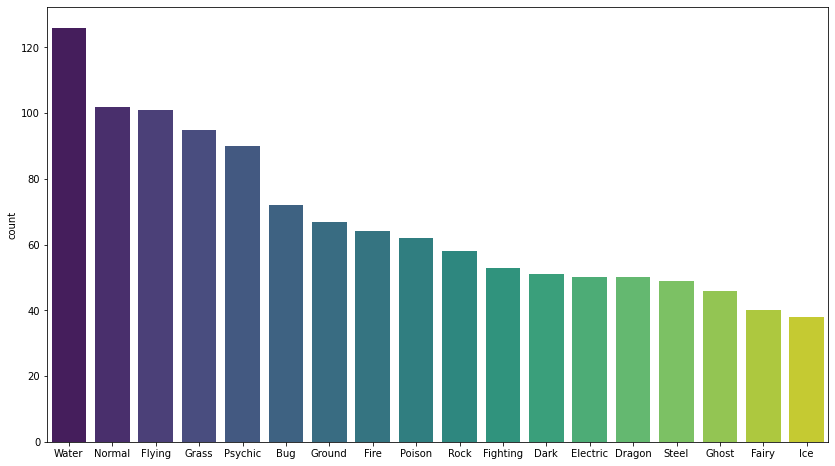

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x=alltype, ax=ax, palette="viridis", order=alltype.value_counts().index)

<AxesSubplot:xlabel='Type1', ylabel='count'>

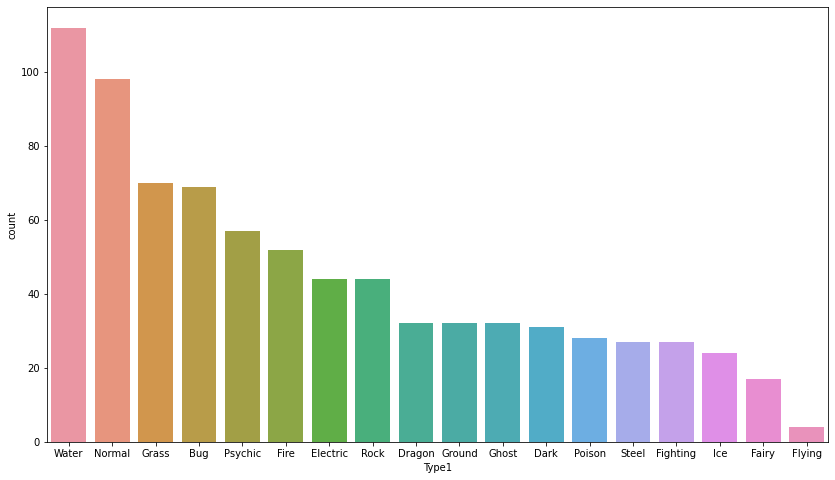

In [11]:
#Display counts of each Type 1 Element
firsttypes = pok["Type1"]

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x=firsttypes, ax=ax, order=pok["Type1"].value_counts().index)

<AxesSubplot:xlabel='Type2', ylabel='count'>

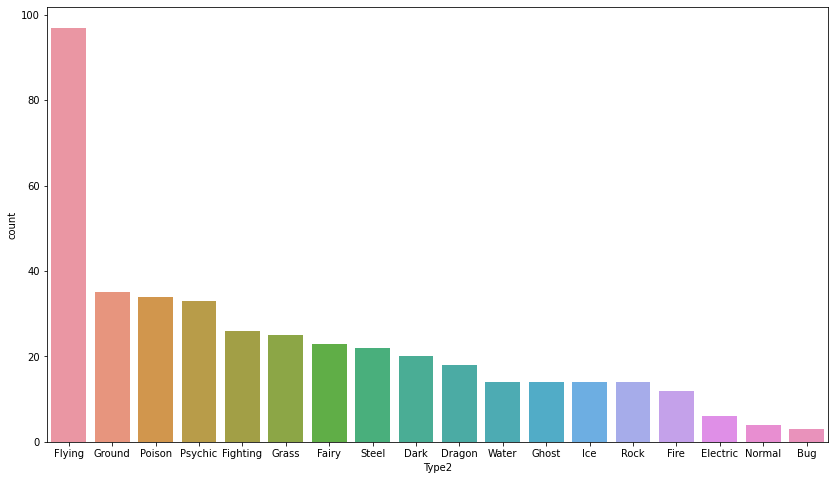

In [12]:
##Display counts of each Type 2 Element


secondtypes = pok["Type2"]

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x=secondtypes, ax=ax, order=pok["Type2"].value_counts().index)

In [13]:
from sklearn.preprocessing import OneHotEncoder

<function pandas.plotting._misc.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, range_padding=0.05, **kwargs)>

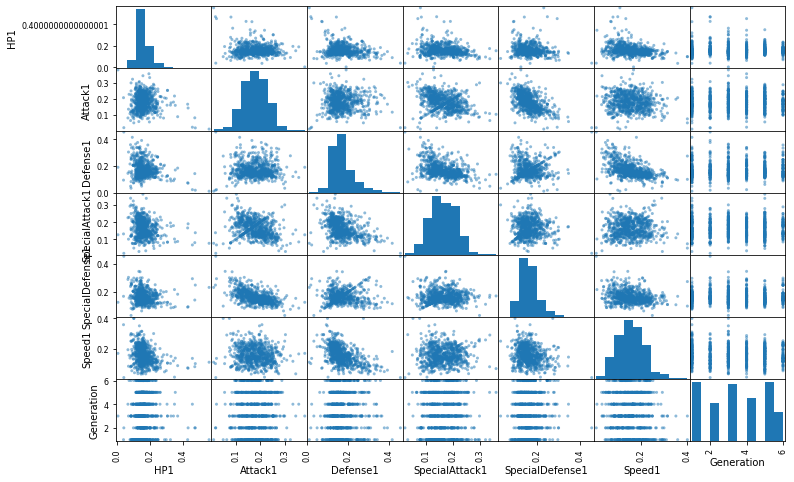

In [14]:
#Checking for correlation between features using pandas scatter matrix


from pandas.plotting import scatter_matrix

attributes = [
    "Type1",
    "Type2",
    "HP1",
    "Attack1",
    "Defense1",
    "SpecialAttack1",
    "SpecialDefense1",
    "Speed1",
    "Generation",
]
scatter_matrix(pok[attributes], figsize=(12, 8))
scatter_matrix

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


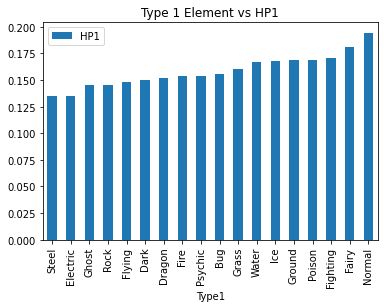

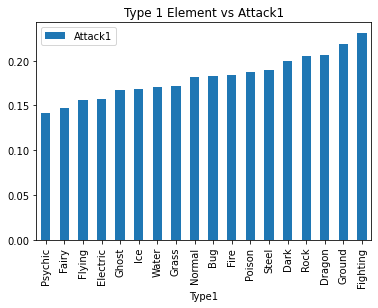

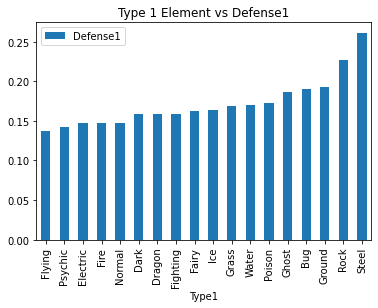

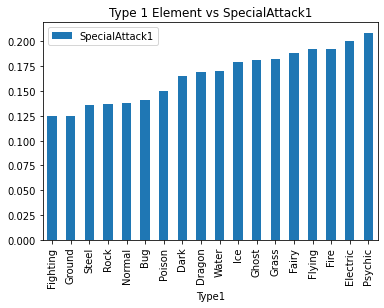

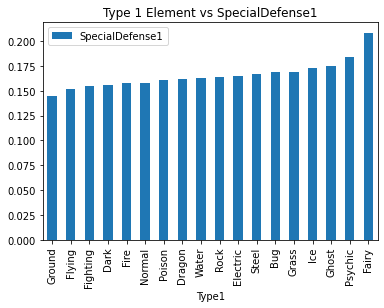

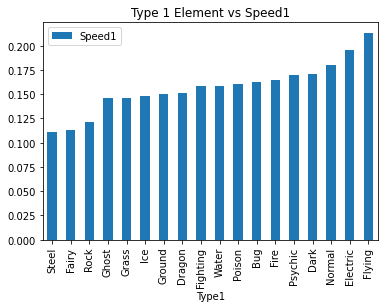

In [17]:
#Took Average of each feature with its respective element for both Type 1 and Type 2 Elements

from matplotlib import cm

pokavg = pok[
    [
        "Type1",
        "HP1",
        "Attack1",
        "Defense1",
        "SpecialAttack1",
        "SpecialDefense1",
        "Speed1",
    ]
]

stats = ["HP1", "Attack1", "Defense1", "SpecialAttack1", "SpecialDefense1", "Speed1"]


for x in stats:
    pok_avg = pokavg.groupby(["Type1"])[x].mean().reset_index()

    pok_avg = pok_avg.sort_values([x], ascending=True).plot(
        kind="bar", x="Type1", title="Type 1 Element vs " + x
    )

    print(pok_avg)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


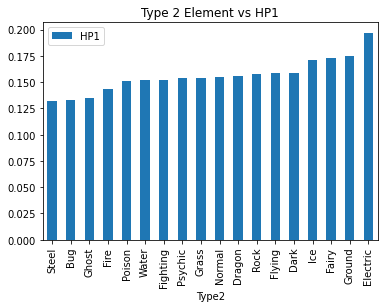

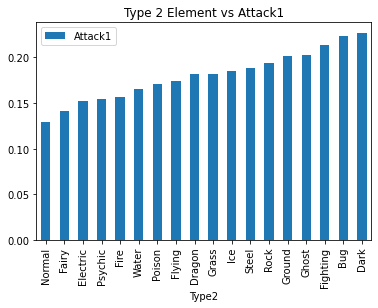

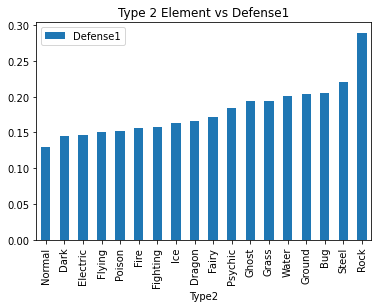

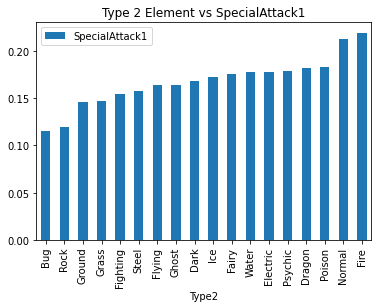

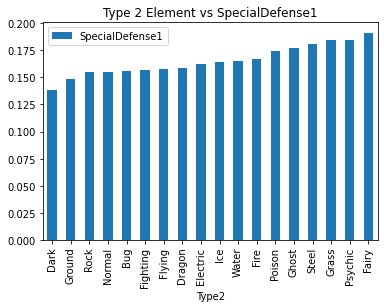

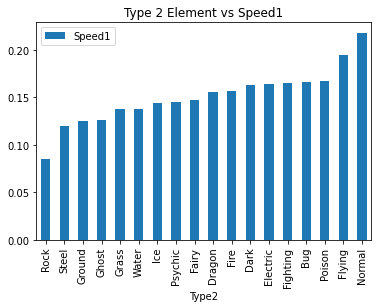

In [18]:
pokavg2 = pok[
    [
        "Type2",
        "HP1",
        "Attack1",
        "Defense1",
        "SpecialAttack1",
        "SpecialDefense1",
        "Speed1",
    ]
]


for x in stats:

    pok2_avg = pokavg2.groupby(["Type2"])[x].mean().reset_index()

    pok2_avg = pok2_avg.sort_values([x], ascending=True).plot(
        kind="bar", x="Type2", title="Type 2 Element vs " + x
    )

    print(pok2_avg)

In [ ]:
#Number of null values in each feature of dataset

poknullvalues = pok.isnull().sum()
poknullvalues

# Takeaways
**1)** Dataset is heavily imbalanced. There may be an abudance of a specific type 1 element but very little of that element in the Type 2 Feature. Since there is little difference in flipping the elements of a Pokemon's element type 1 and type 2, a possible idea is to group elements of each row into a list.

**2)** Slighly under half the pokemon do not have a Type 2 Element. This may cause issues or skew results in modeling.

**3)** Scatter Matrix shows very little correlation between attributes, a telling sign that there may not be a feasible to deduce the element type based strictly on stats. 

**4)** Taking the averages of each feature based on the respective element shows some correlation with some elements. For example, a type 2 Rock has a higher defense on average than other type 2 elements.

**5)** Will Use Multilabel classification to predict multiple (ideally 1 or 2) labels (element types) given the inputted features (stats - Attack, Defense, etc).



# References

**1)** Barradas, Alberto. “Pokemon with Stats.” Kaggle, 29 Aug. 2016, https://www.kaggle.com/abcsds/pokemon. 

**2)** Géron Aurélien. Hands-on Machine Learning with Scikit-Learn and Tensorflow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly, 2019. 